## **Multiple Linear Regression**

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [57]:
df_index = pd.read_csv('Economic_index.csv')

In [58]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.3,1256


In [59]:
# drop unnecessary columns
df_index.drop(columns=["Unnamed: 0","year","month"], axis=1,inplace=True)

In [60]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.3,1256


In [61]:
## check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

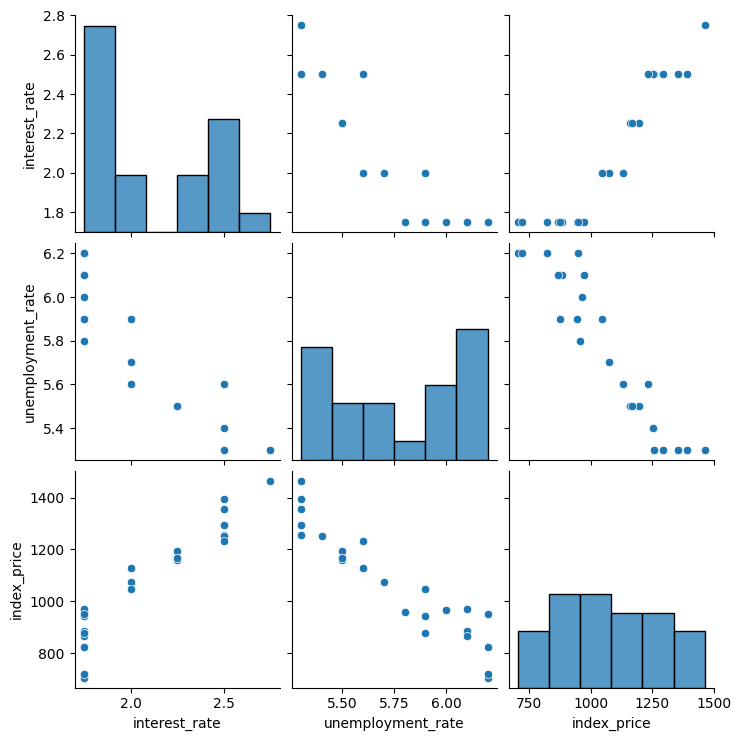

In [62]:
## do some visualisation
import seaborn as sns
sns.pairplot(df_index)

In [63]:
# check if there is any correlation between the variables
df_index.corr() #interest_rate and index_price seem to have some correlation
# rest all the relations are inversely proportional

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.922099,0.935793
unemployment_rate,-0.922099,1.000000,-0.940288
index_price,0.935793,-0.940288,1.000000


Text(0, 0.5, 'Unemployment rate')

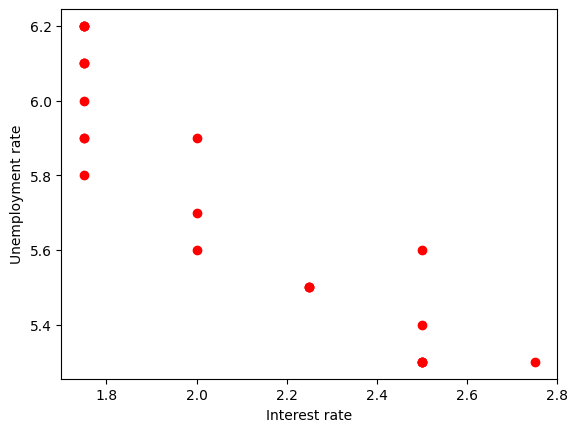

In [64]:
## visualise the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("Unemployment rate")

In [65]:
## get independeat and dependent variables
# X = df_index[['interest_rate','unemployement_rate']]
## or else it can also be 
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]
# y = df_index['index_price']

In [66]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.3


In [67]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [68]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

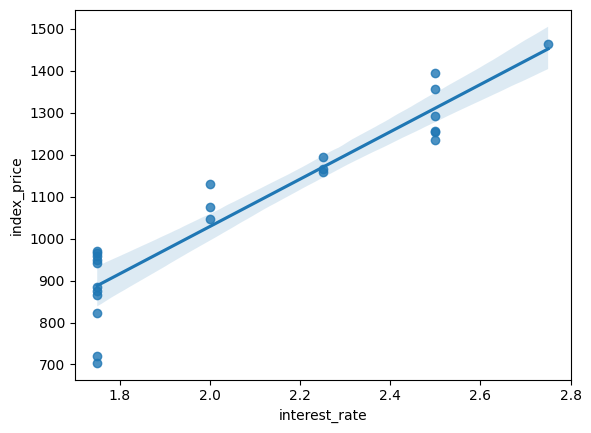

In [69]:
sns.regplot(x='interest_rate',y='index_price',data=df_index)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

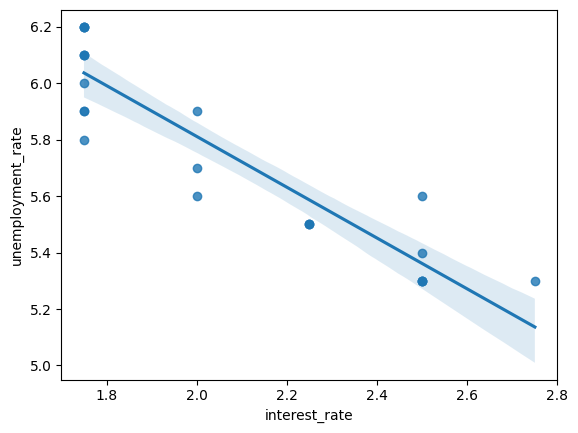

In [70]:
sns.regplot(x='interest_rate',y='unemployment_rate',data=df_index)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

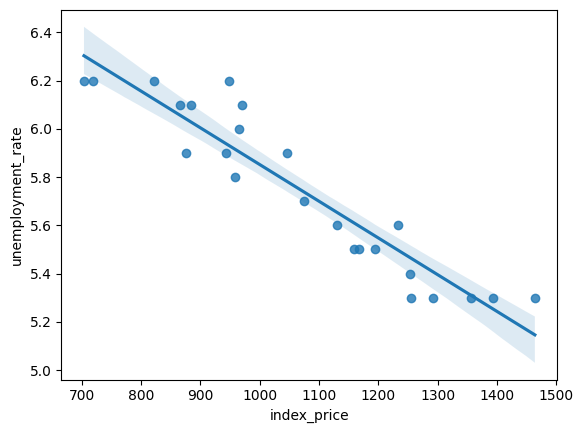

In [71]:
sns.regplot(x='index_price',y='unemployment_rate',data=df_index)

In [72]:
# standardize the data
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [74]:
X_train

array([[-0.90115511,  0.69893295],
       [ 1.31077107, -1.34910313],
       [-0.90115511,  1.28408611],
       [ 1.31077107, -1.05652655],
       [ 1.31077107, -1.34910313],
       [-0.16384638,  0.40635637],
       [-0.90115511,  0.11377978],
       [ 1.31077107, -1.34910313],
       [ 1.31077107, -1.34910313],
       [-0.90115511,  1.28408611],
       [-0.90115511,  1.28408611],
       [-0.90115511,  0.40635637],
       [-0.90115511,  1.28408611],
       [ 0.57346234, -0.76394997],
       [-0.16384638, -0.47137338],
       [-0.90115511,  0.40635637],
       [-0.90115511,  0.99150953],
       [ 1.31077107, -0.47137338]])

In [75]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [76]:
regression.fit(X_train,y_train)

LinearRegression()

In [77]:
# create a cross validation
from sklearn.model_selection import cross_val_score 
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [78]:
np.mean(validation_score)

np.float64(-5218.550957909888)

In [79]:
## prediction
y_pred = regression.predict(X_test)

In [80]:
y_pred

array([1166.57868117,  800.5533791 , 1359.58069356,  800.5533791 ,
       1026.82185256, 1166.57868117])

In [81]:
# Performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [82]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:",mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:",rmse)

Mean Squared Error: 8216.25474694071
Mean Absolute Error: 69.08178261333315
Root Mean Squared Error: 90.64355877248373


In [83]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("R2 Score:",score)

R2 Score: 0.7559383305857563


In [86]:
print("Adjusted R2:",1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)) # adjusted R2

Adjusted R2: 0.5932305509762605


## **Assumptions**

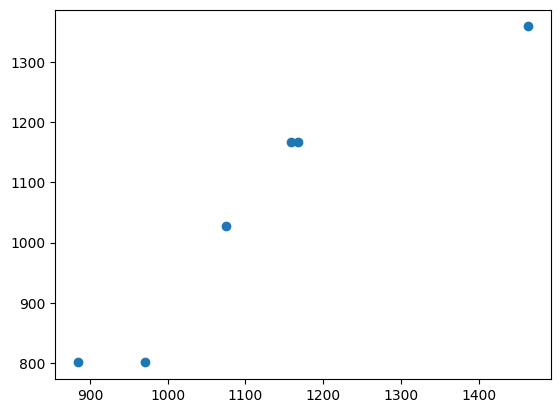

In [87]:
plt.scatter(y_test,y_pred)

In [88]:
residuals = y_test - y_pred
print(residuals)

8      -7.578681
16    170.446621
0     104.419306
18     83.446621
11     48.178147
9       0.421319
Name: index_price, dtype: float64


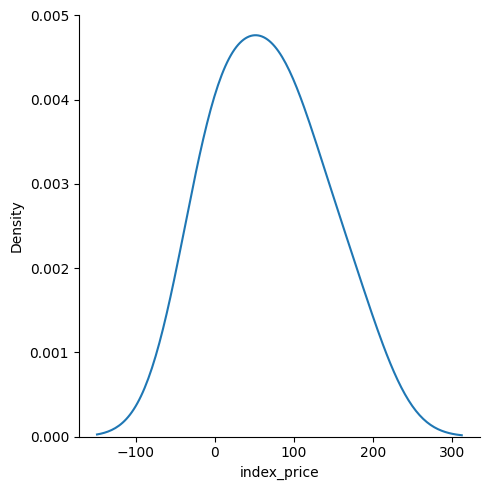

In [89]:
sns.displot(residuals, kind='kde') # bell shape cureve means model is doing well

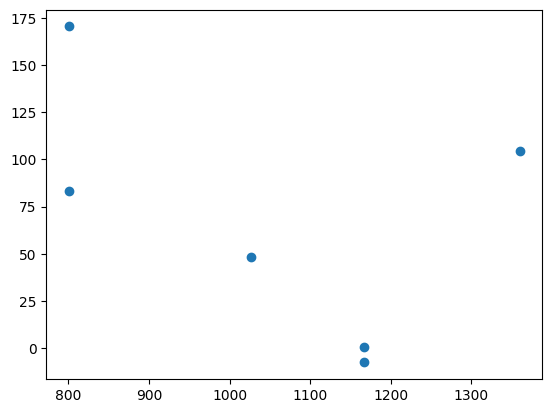

In [90]:
## scatter wrt to residuals and predicted values
plt.scatter(y_pred, residuals)

In [91]:
## Do the same using OLS method
import statsmodels.api as sm

In [92]:
model=sm.OLS(y_train,X_train).fit()

In [93]:
model.summary()

d:\MachineLearningAlgorithms\ml_algos\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.085
Method:                 Least Squares   F-statistic:                             0.2928
Date:                Sat, 01 Feb 2025   Prob (F-statistic):                       0.750
Time:                        13:08:51   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            73.7146    658.082      0.112      0.912   -1321.358    1468.787
x2          -132.1487    658.082     -0.201      0.843   -1527.221    1262.924
==============================================================================
Omnibus:                        0.075   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.963   Jarque-Bera (JB):                0.065
Skew:                           0.028   Prob(JB):                        0.968
Kurtosis:                       2.710   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
print(regression.coef_)

[  73.71461902 -132.14872033]
